**texto en negrita**#  UTN FINANZAS Y CONTROL EMPRESARIO
# CLASE 1
## MATEMATICA FINANCIERA CON PYTHON

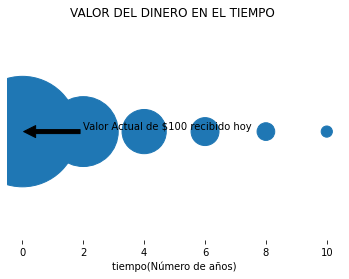

In [ ]:
from matplotlib.pyplot import *
fig1 = figure(facecolor='white')
ax1 = axes(frameon=False)
ax1.set_frame_on(False)
ax1.get_xaxis().tick_bottom()
ax1.axes.get_yaxis().set_visible(False)
x=range(0,11,2)
x1=range(len(x),0,-1)
y = [0]*len(x);
name="Valor Actual de $100 recibido hoy"
annotate(name,xy=(0,0),xytext=(2,0.001),arrowprops=dict(facecolor='black',shrink=0.02))
s = [50*2.5**n for n in x1];
title("VALOR DEL DINERO EN EL TIEMPO ")
xlabel("tiempo (Número de años)")
scatter(x,y,s=s);
show()

#VALOR ACTUAL DE UN VALOR FUTURO
Calcular el valor presente de una suma de dinero es resolver un problema de valor del dinero en el tiempo.
La función numpy.pv() determina el valor actual de uno o más flujos de caja futuros.
La tasa de interés que se utiliza para calcular el valor presente también se denomina tasa de descuento: a qué tasa se descuenta un pago futuro para calcular su valor presente.
Como la tasa de interés siempre se cotiza como tasa de interés anual al calcular el valor actual usando numpy.pv(,), la tasa de interés anual debe convertirse a una tasa para el período de cálculo. Para hacer esto, la tasa de interés anual debe dividirse por la frecuencia de capitalización. Por ejemplo, si la frecuencia de capitalización es 12 por año y la tasa de interés anual es 5%, la tasa de interés mensual es 0.05/12. Si la frecuencia de capitalización es de 4 por año y la tasa de interés anual es del 5%, la tasa de interés trimestral está dada por 0,05/4.



> **Retorno acumulado**

Si invertimos 100 en un activo que crece al 5% anual aplicamos la siguiente fórmula:

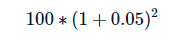


En este caso debemos elevar 1+i a la cantidad de períodos

Supongamos que ahorramos 10 mil dólares por año durante 30 años y queremos saber cuánto tendremos al final del período
De esta forma, calculemos el valor futuro para una inversión de 10000 dolares anuales que crece al 12% anual por 30 años con la siguiente fórmula:

In [ ]:
# Valor futuro de una inversión
vf = 10000 * (1 + 0.12)**(30)
print("El valor futuro de la inversión inicial es de USD : " + str(round(vf, 2)))

El valor futuro de la inversión inicial es de USD : 299599.22


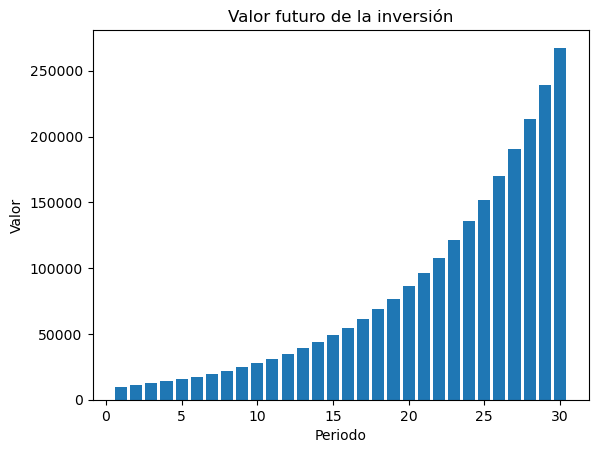

In [ ]:
# Ahora lo graficamos
import matplotlib.pyplot as plt

vf = 10000 * (1 + 0.12)**(30)
bar_data = [0] * 30
bar_data[0] = 10000

for i in range(1, len(bar_data)):
  bar_data[i] = bar_data[i-1] * 1.12

plt.bar(range(1, 31), bar_data)
plt.xlabel("Periodo")
plt.ylabel("Valor")
plt.title("Valor futuro de la inversión")
plt.show()


**El poder del interés compuesto**

Es importante analizar también cómo capitaliza la tasa
Veamos qué ocurre si la capitalización es semestral


In [ ]:
# Definimos el valor de las variables
inv_inicial = 10000 # inversión incial
n = 30 # períodos
tasa = 0.12 # tasa del período

# Calculamos el valor futuro con capitalización semestral
per_cap = 2 # periodos de capitalización
inv_1 = inv_inicial*(1 + tasa / per_cap)*(per_cap*n)
print("Inversión acumulada al año 30 es de USD " + str(round(inv_1, 2)))

Inversión acumulada al año 30 es de USD 636000.0


Calculamos ahora para capitalización trimestral

In [ ]:
# Capitalización trimestral
per_cap = 4 # periodos de capitalización
inv_2 = inv_inicial*(1 + tasa / per_cap)*(per_cap*n)
print("Inversión acumulada al año 30 es de USD " + str(round(inv_2, 2)))

Inversión acumulada al año 30 es de USD 1236000.0


Capitalización mensual

In [ ]:
per_cap = 12 # periodos de capitalización
inv_3 = inv_inicial*(1 + tasa / per_cap)*(per_cap*n)
print("Inversión acumulada al año 30 es de USD " + str(round(inv_3, 2)))

Inversión acumulada al año 30 es de USD 3636000.0


Capitalización Diaria

In [ ]:
per_cap = 360 # periodos de capitalización
inv_4 = inv_inicial*(1 + tasa / per_cap)*(per_cap*n)
print("Inversión acumulada al año 30 es de USD " + str(round(inv_4, 2)))

Inversión acumulada al año 30 es de USD 108036000.0


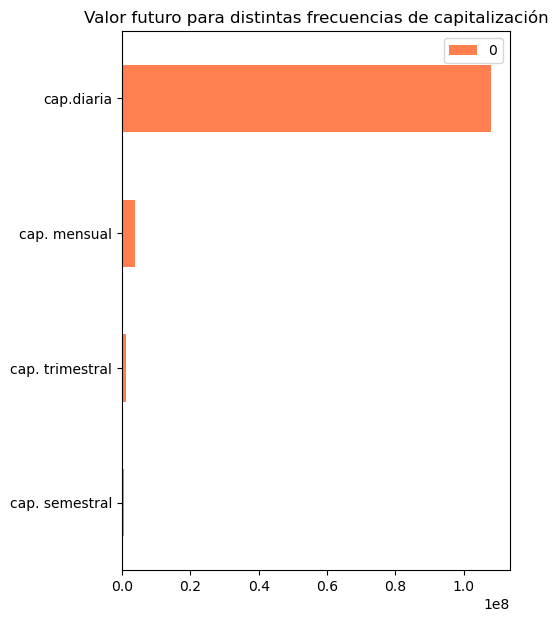

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
inversiones = [inv_1, inv_2, inv_3, inv_4]
capitalizacion = ['cap. semestral', 'cap. trimestral', 'cap. mensual', 'cap.diaria']
inv = pd.DataFrame(inversiones, capitalizacion)
inv.plot.barh(title='Valor futuro para distintas frecuencias de capitalización', figsize = (5, 7), color = "coral");


## Factores de descuento y depreciación
No todo crece en el tiempo, en algunos casos se puede reflejar una depreciación. Para hacerlo definimos una tasa negativa de crecimiento.

Por ejemplo, calcular el valor final de 10.000 iniciales que se deprecian 3% por año por 10 años:

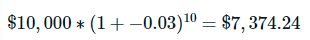

También podemos calcular el valor futuro de 100 invertidos hoy que se deprecia 5% por año por 10 años.



In [ ]:
# valor futuro con depreciación
inv_inicial = 100
tasa = -0.05
n = 10
vf = inv_inicial*(1 + tasa)**(n)
print("El valor futuro depreciado es: USD " + str(round(vf, 2)))

El valor futuro depreciado es: USD 59.87


Ahora calculamos un factor de descuento (similar a la TAbla I de matemática financiera) .

In [ ]:
# Calcular el factor de descuento

tasa = 0.12
n = 10


factor_dto = 1/((1 + tasa)**(n))
tabla1 = factor_dto
print("El factor de descuento es " + str(round(factor_dto, 2)))

El factor de descuento es 0.32


Ahora podemos mostrar una tabla que relaciones distintas tasas y distintos n

In [ ]:
import pandas as pd

tasa = 0.12
n_valores = range(1,31)
tasa_valores = [0.01*i for i in range(1,31)]
resultados = []

for n in n_valores:
    for tasa in tasa_valores:
        factor_dto = 1/((1 + tasa)**(n))
        vf = 1 * (1 + tasa)**(n)
        vp = vf * factor_dto
        resultados.append([n, tasa, round(factor_dto, 2), round(vf, 2), round(vp, 2)])

df_resultados = pd.DataFrame(resultados, columns=['N', 'Tasa', 'Factor de Descuento', 'Valor Futuro', 'Valor Presente'])
print(df_resultados)



      N  Tasa  Factor de Descuento  Valor Futuro  Valor Presente
0     1  0.01                 0.99          1.01             1.0
1     1  0.02                 0.98          1.02             1.0
2     1  0.03                 0.97          1.03             1.0
3     1  0.04                 0.96          1.04             1.0
4     1  0.05                 0.95          1.05             1.0
..   ..   ...                  ...           ...             ...
895  30  0.26                 0.00       1025.93             1.0
896  30  0.27                 0.00       1300.50             1.0
897  30  0.28                 0.00       1645.50             1.0
898  30  0.29                 0.00       2078.22             1.0
899  30  0.30                 0.00       2620.00             1.0

[900 rows x 5 columns]


Vemos en dos gráficos como cae el factor de descuento antes aumentos de n y de la tasa de interés


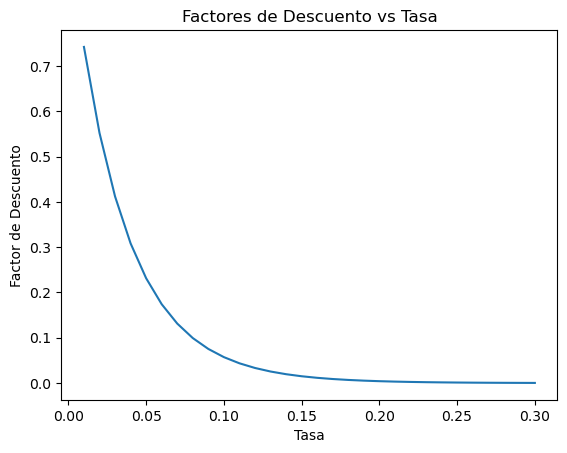

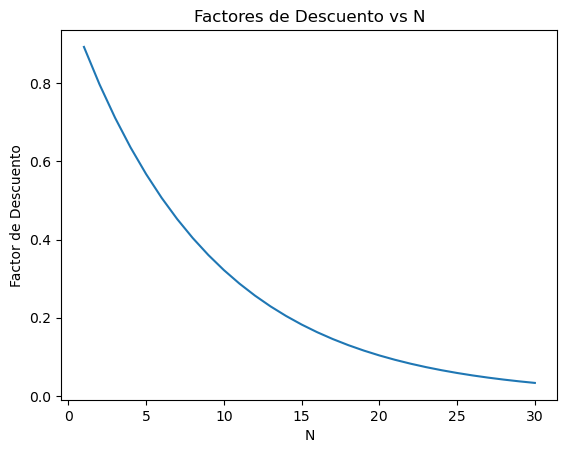

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Valores de tasa y n
tasa_values = [i/100 for i in range(1, 31)]
n_values = [i for i in range(1, 31)]

# Lista de factores de descuento
factor_dto_tasa = [1/((1 + tasa)**(n)) for tasa in tasa_values]
factor_dto_n = [1/((1 + 0.12)**(n)) for n in n_values]

# Gráfico de factores de descuento vs tasa
plt.plot(tasa_values, factor_dto_tasa)
plt.title("Factores de Descuento vs Tasa")
plt.xlabel("Tasa")
plt.ylabel("Factor de Descuento")
plt.show()

# Gráfico de factores de descuento vs n
plt.plot(n_values, factor_dto_n)
plt.title("Factores de Descuento vs N")
plt.xlabel("N")
plt.ylabel("Factor de Descuento")
plt.show()


**VALOR PRESENTE DE UNA ANUALIDAD VENCIDA (Tabla II)**

In [ ]:
# Armamos una función que depende de la tasa y del plazo y nos devuelve el factor de descuento de la anualidad
def factor_descuento_anualidad_vencida(tasa, n):
    factor_dto = (1 - (1 + tasa)**(-n)) / tasa
    return factor_dto

factor_descuento_anualidad_vencida(0.1, 10)

6.144567105704685

Si yo quiero saber cuál es el valor actual de una anualidad vencida de 1000 dólares que se pagarán todos los años durante 5 años al 8% anual, tengo que hacer:

In [ ]:
1000 * factor_descuento_anualidad_vencida(0.08,5)

3992.710037078088

Ahora armamos una tabla con resultados para distintos n y distintas tasas

In [ ]:
import pandas as pd

tasa_values = [0.01, 0.05, 0.10, 0.15, 0.20, 0.30, 0.40, 0.50]
n_values = range(1, 31)

resultados = []

for n in n_values:
    fila_resultados = []
    for tasa in tasa_values:
        factor_dto = (1 - (1 + tasa)**(-n)) / tasa
        fila_resultados.append(round(factor_dto, 4))
    resultados.append(fila_resultados)

df_resultados = pd.DataFrame(resultados, index=n_values, columns=tasa_values)

print(df_resultados)


       0.01     0.05    0.10    0.15    0.20    0.30    0.40    0.50
1    0.9901   0.9524  0.9091  0.8696  0.8333  0.7692  0.7143  0.6667
2    1.9704   1.8594  1.7355  1.6257  1.5278  1.3609  1.2245  1.1111
3    2.9410   2.7232  2.4869  2.2832  2.1065  1.8161  1.5889  1.4074
4    3.9020   3.5460  3.1699  2.8550  2.5887  2.1662  1.8492  1.6049
5    4.8534   4.3295  3.7908  3.3522  2.9906  2.4356  2.0352  1.7366
6    5.7955   5.0757  4.3553  3.7845  3.3255  2.6427  2.1680  1.8244
7    6.7282   5.7864  4.8684  4.1604  3.6046  2.8021  2.2628  1.8829
8    7.6517   6.4632  5.3349  4.4873  3.8372  2.9247  2.3306  1.9220
9    8.5660   7.1078  5.7590  4.7716  4.0310  3.0190  2.3790  1.9480
10   9.4713   7.7217  6.1446  5.0188  4.1925  3.0915  2.4136  1.9653
11  10.3676   8.3064  6.4951  5.2337  4.3271  3.1473  2.4383  1.9769
12  11.2551   8.8633  6.8137  5.4206  4.4392  3.1903  2.4559  1.9846
13  12.1337   9.3936  7.1034  5.5831  4.5327  3.2233  2.4685  1.9897
14  13.0037   9.8986  7.3667  5.72

**Valor presente de una anualidad adelantada**

Esta función utiliza la fórmula matemática del factor de descuento de una anualidad adelantada que se muestra a continuación:

FD = [1 - (1 + i)^(-n-1)] / [i*(1 + i)]

Donde:

i es la tasa de descuento
n es el número de períodos de la anualidad

In [ ]:
def factor_descuento_anualidad_adelantada(tasa, n):
    factor_dto_aa = (1 - (1 + tasa)**(-n-1)) / (tasa*(1 + tasa))
    return factor_dto_aa


Por ejemplo, si quisieras calcular el factor de descuento de una anualidad adelantada con una tasa de descuento del 8% y una duración de 5 períodos, podrías hacer lo siguiente:

In [ ]:
factor_dto_aa = factor_descuento_anualidad_adelantada(0.08, 5)
print("El factor de descuento de la anualidad adelantada es:", factor_dto_aa)


El factor de descuento de la anualidad adelantada es: 4.280444133297401


Si yo quiero saber cuál es el valor actual de una anualidad adelantada de 1000 dólares que se pagarán todos los años durante 5 años al 8% anual, tengo que hacer:

In [ ]:
1000 * factor_descuento_anualidad_adelantada(.08,5)

4280.444133297401

## Valor presente y valor futuro

Cálculo del valor actual de un valor futuro

In [ ]:
# valor actual
factor_dto = 1/((1 + tasa)**(n))
tabla1 = factor_dto

vp = vf * factor_dto # o lo que es lo mismo vp = vf * tabla1

n = 10
tasa = 0.12
vf = 3000
print("Valor Actual $: " + str(round(vp, 2)))

Valor Actual $: 965.92


y el Valor Futuro de un valor presente

In [ ]:
# valor futuro
factor_dto = 1/((1 + tasa)**(n))
tabla1 = factor_dto
n = 10
tasa = 0.12
vp = 3000

vf = vp / factor_dto # o lo que es lo mismo vf = vp / tabla1


print("Valor Futuro $: " + str(round(vf, 2)))

Valor Futuro $: 9317.54


## Valor presente con libería numpy financial
Existe la librería numpy financial con los siguientes parámetros

rate: tasa de descuento
nper: número de períodos
pmt: pago inicial o final de cada período
fv: valor futuro de la inversión



In [ ]:
# instalamos la librería con el siguiente comando
pip install numpy-financial

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# luego importamos la librería como numpy-financial as npf
import numpy_financial as npf

# calcular un valor actual para tasa de 3%, 15 años y valor futuro de 10.000
investment_1 = npf.pv(rate=0.03, nper=15, pmt=0, fv=10000)

# Hay que multiplicar el valor actual por -1 ya que la fórmula arroja valor negativo
print("Valor actual es " + str(round(-investment_1, 2)) + " en dólares de hoy")

# Calculate investment_2
investment_2 = npf.pv(rate=0.05, nper=10, pmt=0, fv=10000)
print("Valor actual es " + str(round(-investment_2, 2)) + " en dólares de hoy")

Valor actual es 6418.62 en dólares de hoy
Valor actual es 6139.13 en dólares de hoy


##Valor Futuro
Se la misma forma se puede calcular con estos parámetros

rate: tasa de interes
nper: duración de la inversión
pmt: pago inicial
pv: Valor presente
Tener presente que lo calcula con valor negativo porque es un pago

Ejemplo

In [ ]:
# Valor futuro de una inversión de 10.000 con tasa de 5% y 15 años
investment_1 = npf.fv(rate=0.05, nper=15, pmt=0, pv=-10000)
print("el valor futuro será de $" + str(round(investment_1, 2)) + " en 15 años")

# Valor futuro de una inversión de 10.000 con tasa de 8% y 15 años
investment_2 = npf.fv(rate=0.08, nper=15, pmt=0, pv=-10000)
print("el valor futuro será de $" + str(round(investment_2, 2)) + " en 15 años")

el valor futuro será de $20789.28 en 15 años
el valor futuro será de $31721.69 en 15 años


**Valores futuros ajustados por inflación**

En primer lugar calculamos el valor futuro como vimos anteriormente. Luego, calculamos el valor presente descontando a la tasa proyectada de inflación

Ejemplo: Calcular el valor futuro de 10.000 de inversion que rinden 8% anual por 10 años y asignarlo ala variable: investment_1.
Calcular el valor presente ajustado por inflación, utilizando una tasa de inflación de 3% por año y asignarlo a la variable investment_1_discounted.

In [ ]:
# Calculamos investment_1
investment_1 = npf.fv(rate=0.08, nper=10, pmt=0, pv=-10000)
print("Investment 1 se transformará en $" + str(round(investment_1, 2)) + " en 10 años")

# Calculate investment_2
investment_1_discounted = npf.pv(rate=0.03, nper=10, pmt=0, fv=investment_1)
print("Luego del ajuste por inflación, investment 1 valdrá $" + str(round(-investment_1_discounted, 2)) + " en dólares de hoy")

Investment 1 se transformará en $21589.25 en 10 años
Luego del ajuste por inflación, investment 1 valdrá $16064.43 en dólares de hoy


In [ ]:
# instalamos la librería con el comando: pip install numpy-financial
# link a documentación https://numpy.org/numpy-financial/latest/

import numpy_financial as npf

TasaInteres = 0.06 # Tasa de interes anual
Capitalizacion = 1  # Una vez al año
ValorFuturo = 100 # Valor futuro a descontar
ValorPresente = npf.pv(TasaInteres / Capitalizacion, Capitalizacion, 0, ValorFuturo, when='end');
print("La tasa de Interes es de: %.2f"%(TasaInteres*100));
print("La frecuencia de capitalización es: %d" %Capitalizacion);
print("El valor futuro es de: %5.2f"%ValorFuturo);
print("El Valor Presente es de:%5.2f"%ValorPresente);

La tasa de Interes es de: 6.00
La frecuencia de capitalización es: 1
El valor futuro es de: 100.00
El Valor Presente es de:-94.34


También podemos definir una función de Valor Futuro y Valor Presente para volver a utilizarlas luego

In [ ]:
def ValorPresente(nper,int,ValorFuturo):
    return(ValorFuturo/(1+int)**nper)
print(ValorPresente(12, 0.5, 50000))

385.367331462947


In [ ]:
def ValorFuturo(nper,int,ValorPresente):
    return(round((ValorPresente*(1+int)**nper), 2))
print(ValorFuturo(12, 0.3, 10000))

232980.85


Calculamos el Valor Actual Neto de un Flujo de Fondos

In [ ]:
FlujoFondos = [-500, 200, 147, 128, 130, 235]; # t0, t1, t2, t3, t4, t5
TasaDescuento = 0.9; # 9 % anual
ValorPresenteNeto = npf.npv(TasaDescuento, FlujoFondos)

print("El Valor Presente Neto es: %3.2f"%npv);

El Valor Presente Neto es: -315.89


Calculamos la TIR

In [ ]:
FlujoFondos = [-1500, 200, 147, 128, 130, 235]   # Flujos de Caja == Cash Flow
Tir = npf.irr(FlujoFondos)
print(Tir)

-0.16235867886411293


CALCULO DE UNA ANUALIDAD EQUIVALENTE (VAE o CAE)

In [ ]:
help(npf.pmt)


Help on function pmt in module numpy_financial._financial:

pmt(rate, nper, pv, fv=0, when='end')
    Compute the payment against loan principal plus interest.
    
    Given:
     * a present value, `pv` (e.g., an amount borrowed)
     * a future value, `fv` (e.g., 0)
     * an interest `rate` compounded once per period, of which
       there are
     * `nper` total
     * and (optional) specification of whether payment is made
       at the beginning (`when` = {'begin', 1}) or the end
       (`when` = {'end', 0}) of each period
    
    Return:
       the (fixed) periodic payment.
    
    Parameters
    ----------
    rate : array_like
        Rate of interest (per period)
    nper : array_like
        Number of compounding periods
    pv : array_like
        Present value
    fv : array_like,  optional
        Future value (default = 0)
    when : {{'begin', 1}, {'end', 0}}, {string, int}
        When payments are due ('begin' (1) or 'end' (0))
    
    Returns
    -------
    out 

In [ ]:
TasaInteres = 0.0835;

nper = 12;

ValorPresente = 100000;

Anualidad = npf.pmt(TasaInteres/12, nper, ValorPresente)

print("La anualidad equivalente al valor presente es: %5.2f"%abs(Anualidad))

La anualidad equivalente al valor presente es: 8715.03
